# Load data

Aggregation Statstics

In [1]:
import pandas as pd
import numpy as np
import os 
# load the pkl file 
data_folder = "/teamspace/studios/this_studio/" 
# df = pd.read_pickle('/content/aggregated_data_to_save_in_db.pkl')
# /content/aggregated_data_to_save_in_db (2).pkl

df = pd.read_pickle(os.path.join(data_folder, '3_new_days_mixtral_integrated_df.pkl'))
df.head(2)

,date,tags,sources,similarity,question,answer,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
2,"NEW YORK,\n 08 gennai...",Ultima ora,"[777, 2, 3, 4]","[0.8523603081703186, 0.8379839658737183, 0.837...",Considerati più titoli e contenuti degli artic...,Secondo i documenti desecretati relativi alla ...,0.053490,0.000864,0.004077,0.001180,0.005823,0.000659,0.156298
7,"NEW YORK,\n 08 gennai...",Cultura,"[229, 462, 310, 7]","[None, 0.7680584192276001, 0.6859229803085327,...",Considerati più titoli e contenuti degli artic...,La cerimonia dei Golden Globe 2024 ha visto il...,0.000447,0.002408,0.016256,0.001952,0.016214,0.000787,0.000568


# Harmful content detection using toxicity analysis

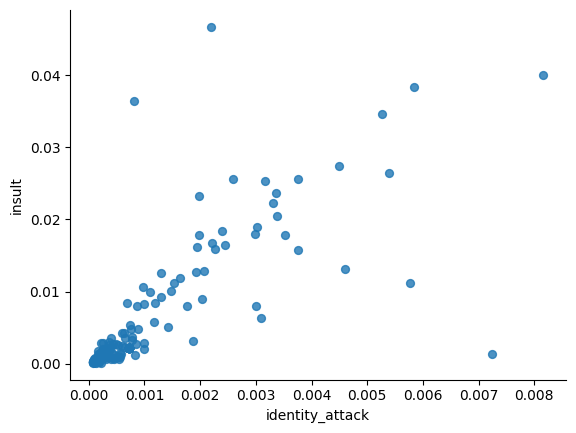

In [2]:
# @title identity_attack vs insult

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='identity_attack', y='insult', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('img/identity_attack_vs_insult.png')
plt.show()

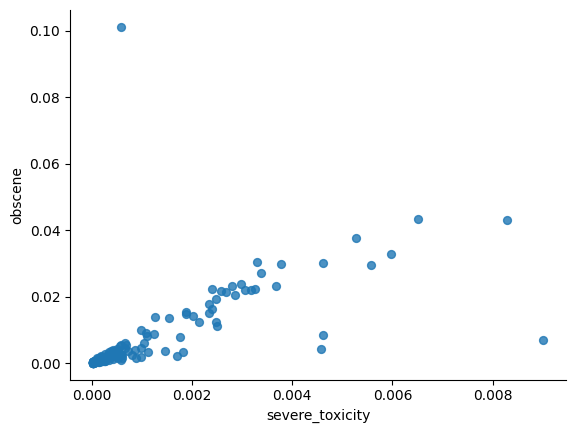

In [3]:
# @title severe_toxicity vs obscene

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='severe_toxicity', y='obscene', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('img/severe_toxicity_vs_obscene.png')
plt.show()

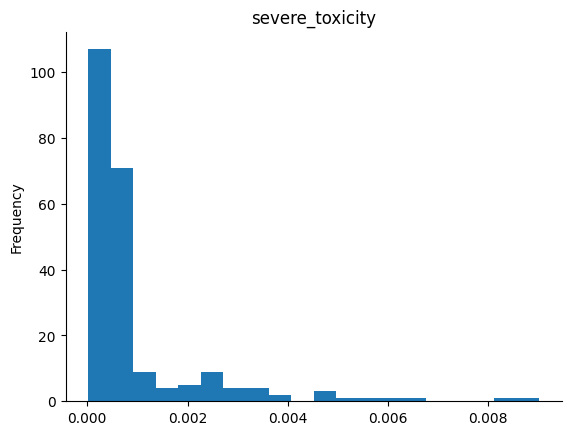

In [4]:
# @title severe_toxicity

from matplotlib import pyplot as plt
df['severe_toxicity'].plot(kind='hist', bins=20, title='severe_toxicity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('img/severe_toxicity.png')
plt.show()

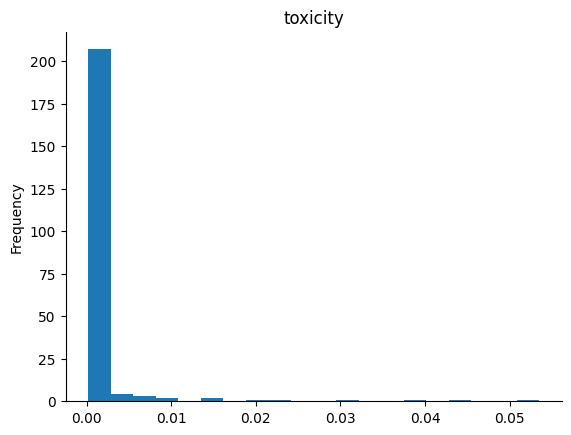

In [5]:
# @title toxicity

from matplotlib import pyplot as plt
df['toxicity'].plot(kind='hist', bins=20, title='toxicity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('img/toxicity.png')
plt.show()

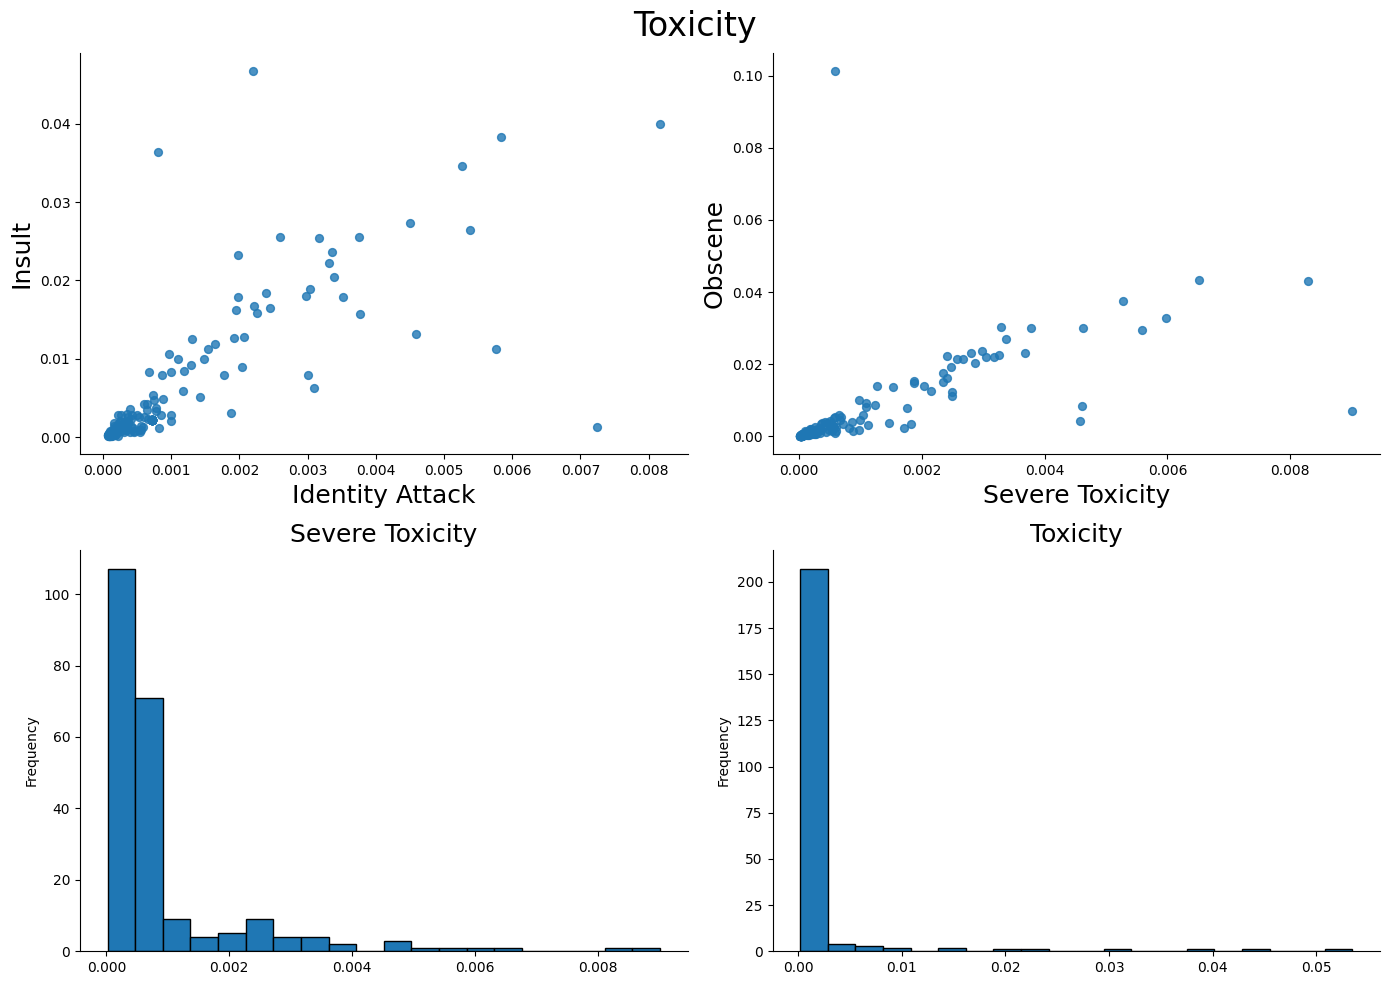

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: identity_attack vs insult
axes[0, 0].scatter(df['identity_attack'], df['insult'], s=32, alpha=0.8)
axes[0, 0].set_xlabel('Identity Attack', fontsize=18)  # Increase x-label font size
axes[0, 0].set_ylabel('Insult', fontsize=18)  # Increase y-label font size
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Scatter plot: severe_toxicity vs obscene
axes[0, 1].scatter(df['severe_toxicity'], df['obscene'], s=32, alpha=0.8)
axes[0, 1].set_xlabel('Severe Toxicity', fontsize=18)  # Increase x-label font size
axes[0, 1].set_ylabel('Obscene', fontsize=18)  # Increase y-label font size
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Histogram: severe_toxicity
df['severe_toxicity'].plot(kind='hist', bins=20, ax=axes[1, 0], title='Severe Toxicity', edgecolor='black')
axes[1, 0].set_title('Severe Toxicity', fontsize=18)  # Increase title font size
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Histogram: toxicity
df['toxicity'].plot(kind='hist', bins=20, ax=axes[1, 1], title='Toxicity', edgecolor='black')
axes[1, 1].set_title('Toxicity', fontsize=18)  # Increase title font size
axes[1, 1].spines[['top', 'right']].set_visible(False)

plt.suptitle('Toxicity', fontsize=24)  # Increase global title font size
plt.tight_layout()
plt.savefig('img/toxicityGrid.png')
plt.show()

In [7]:
df['similarity_cleaned'] = df['similarity'].apply(lambda arr: np.array([val for val in arr if val is not None]))


In [8]:
 # dropping the instanes with apply(len) < 1
df = df[df['similarity_cleaned'].apply(len) > 1]

/tmp/ipykernel_7087/58907466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity_diff'] = df['similarity_cleaned'].apply(lambda x: np.ptp(x))


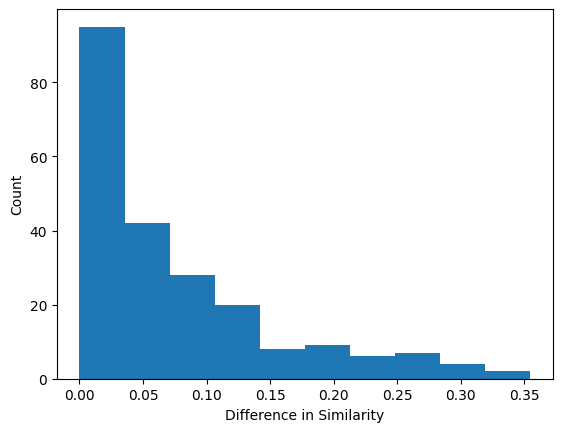

In [9]:
df['similarity_diff'] = df['similarity_cleaned'].apply(lambda x: np.ptp(x))
plt.hist(df['similarity_diff'], bins=10)
plt.xlabel('Difference in Similarity')
plt.ylabel('Count')
plt.savefig('img/similarity_diff.png')
plt.show()

In [10]:
import pkg_resources

# Install seaborn if not already installed
if not pkg_resources.working_set.by_key.get('seaborn'):
    !pip install seaborn

/tmp/ipykernel_7087/253099196.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


/tmp/ipykernel_7087/2123964200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_similarity'] = df['similarity_cleaned'].apply(np.mean)


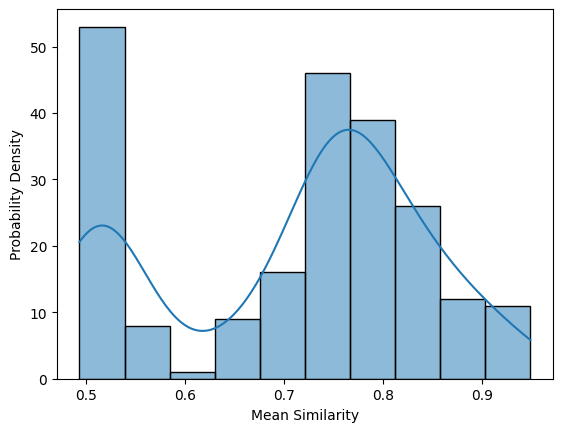

In [11]:
import seaborn as sns
df['mean_similarity'] = df['similarity_cleaned'].apply(np.mean)
sns.histplot(df['mean_similarity'], kde=True, bins=10)
plt.xlabel('Mean Similarity')
plt.ylabel('Probability Density')
plt.savefig('img/mean_similarity.png')
plt.show()

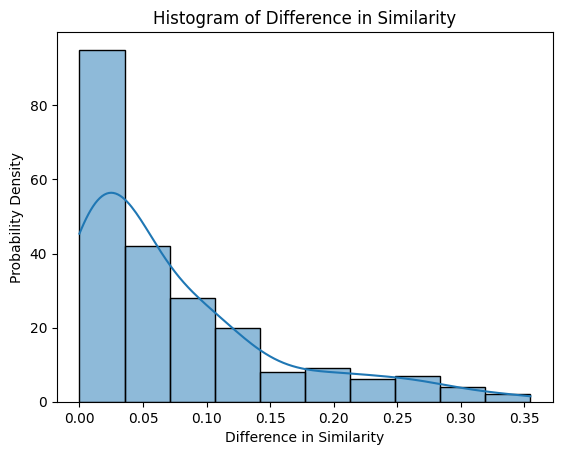

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['similarity_diff'], kde=True, bins=10)
plt.xlabel('Difference in Similarity')
plt.ylabel('Probability Density')
plt.title('Histogram of Difference in Similarity')
plt.savefig('img/similarity_diff.png')
plt.show()

/tmp/ipykernel_7087/2601394807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sources'] = df['sources'].apply(len)


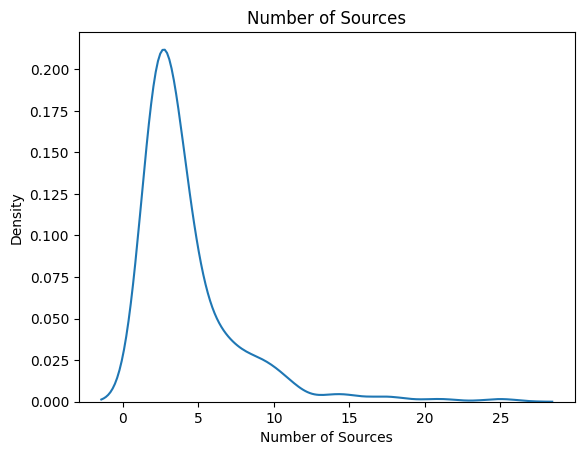

In [13]:
# Add a new column to the DataFrame with the length of the sources for each row
df['num_sources'] = df['sources'].apply(len)
# Create a KDE plot of the number of sources
sns.kdeplot(df['num_sources'], label='Number of Sources')

# Set plot title and labels
plt.title('Number of Sources')
plt.xlabel('Number of Sources')
plt.ylabel('Density')
plt.savefig('img/num_sources.png')

# Show the plot
plt.show()

# Visualization of the data by tags

In [18]:
tag_list = [tag for tag, count in df['tags'].value_counts().items() if count > 3]
df_popular_tag = df[df['tags'].apply(lambda x: x in tag_list)]

/tmp/ipykernel_7087/1372665006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tags', data=df_popular_tag, palette='muted',


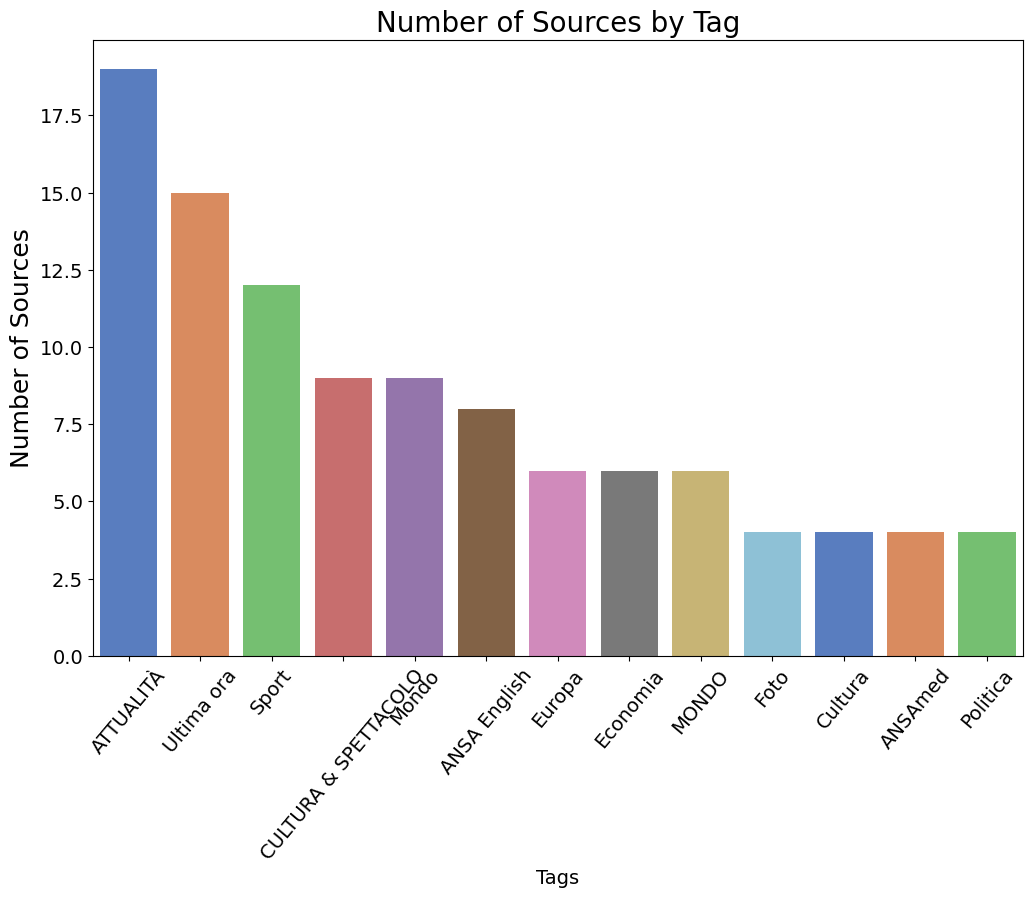

In [19]:
# Create a bar plot showing the number of sources by tag
plt.figure(figsize=(12, 8))  # Increase figure size
sns.countplot(x='tags', data=df_popular_tag, palette='muted', 
              order=df_popular_tag['tags'].value_counts().index) # viridis
plt.xlabel('Tags', fontsize=14)  # Increase x-label font size
plt.ylabel('Number of Sources', fontsize=18)  # Increase y-label font size
plt.title('Number of Sources by Tag', fontsize=20)  # Increase title font size
plt.xticks(rotation=50, fontsize=14)  # Rotate x-ticks and increase font size
plt.yticks(fontsize=14)  # Increase y-ticks font size
plt.savefig('img/num_sources_by_tag.png')
plt.show()

In [24]:
# lowrcase the tags
df_popular_tag.loc[:, 'tags'] = df_popular_tag['tags'].apply(lambda x: x.lower() if x is not None else None)

/tmp/ipykernel_7087/115222567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tags', y='num_sources', data=df_popular_tag, palette='muted') # viridis


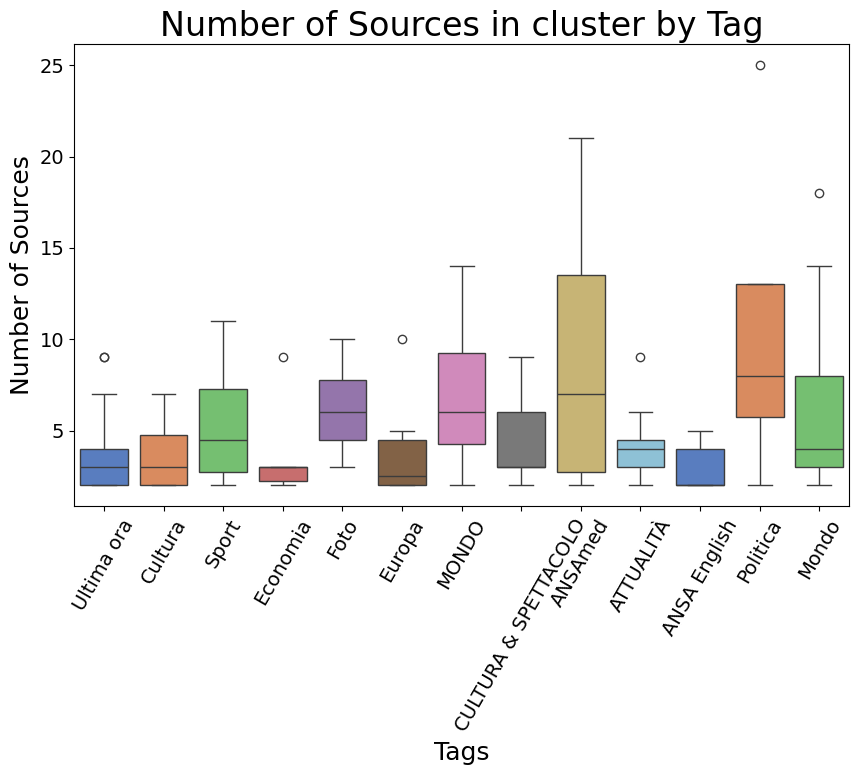

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame loaded (let's call it 'df')
# Create a boxplot of the number of sources by tag
plt.figure(figsize=(10, 6))
sns.boxplot(x='tags', y='num_sources', data=df_popular_tag, palette='muted') # viridis
plt.xlabel('Tags', fontsize=18)  # Increase x-label font size
plt.ylabel('Number of Sources', fontsize=18)  # Increase y-label font size
plt.title('Number of Sources in cluster by Tag', fontsize=24)  # Increase title font size
plt.xticks(rotation=60, fontsize=14)  # Increase x-ticks font size
plt.yticks(fontsize=14)  # Increase y-ticks font size
plt.savefig('img/num_sources_by_tag_boxplot.png')
plt.show()

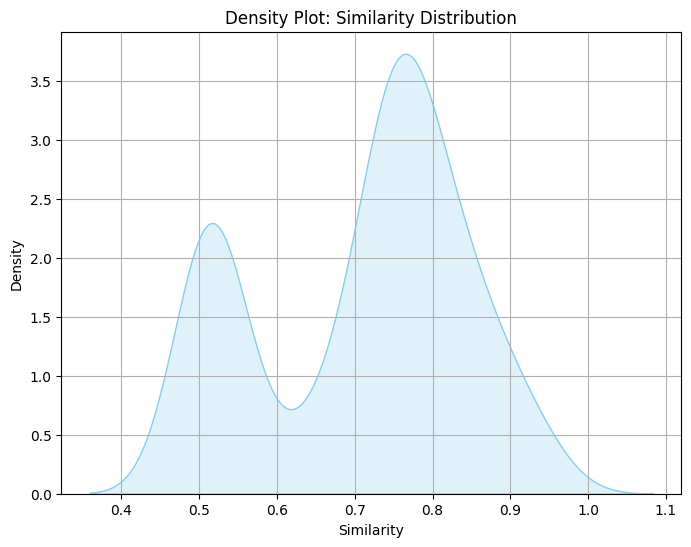

In [16]:
df_slim = df[df['mean_similarity'] > 0.2]
plt.figure(figsize=(8, 6))
sns.kdeplot(df_slim['mean_similarity'], color='skyblue', fill=True)
plt.xlabel('Similarity')
plt.ylabel('Density')
plt.title('Density Plot: Similarity Distribution')
plt.grid(True)
plt.savefig('img/similarity_density.png')
plt.show()